In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import csv
from sklearn import preprocessing



In [2]:
#reading the dataset
dataset = pd.read_csv("dataset/maindataset.csv", index_col=0)

dataset.head()


,Database,C++,Analytical Skills,Python,C,Java,Csharp,R,Statistics,CSS,...,Php,Javascript,Algorithm,Cyber Security,OS,Psyocology,SQL,Communication Skill,Software Testing,TARGET CLASS
1,7,1,8,10,1,1,3,2,7,0,...,0,0,9,0,0,6,8,5,5,Artificial intelligence
2,7,2,8,9,2,2,0,6,6,0,...,0,0,9,0,0,6,8,5,6,Artificial intelligence
3,7,3,8,9,3,9,2,9,10,0,...,0,0,9,0,0,6,8,5,7,Artificial intelligence
4,8,0,6,7,0,2,0,8,10,0,...,0,1,9,3,5,1,7,6,7,data science and analytics
5,8,1,7,8,1,4,1,7,9,0,...,0,2,9,2,3,1,7,6,7,data science and analytics


In [3]:
#courses that will be recommended

courses_name=list(dataset['TARGET CLASS'].drop_duplicates())

courses=pd.DataFrame(courses_name)
courses.columns = ['Courses']
courses

,Courses
0,Artificial intelligence
1,data science and analytics
2,machine learning
3,robotics
4,human computer interaction
5,management information system
6,applied research and innovation
7,network management
8,cloud computing
9,operation research


In [4]:
# Prerequisites stored as a dataframe

ls=list(dataset.columns[:-1])
ls
col=pd.DataFrame(ls)
col.columns = ['Prerequisites']
col

,Prerequisites
0,Database
1,C++
2,Analytical Skills
3,Python
4,C
5,Java
6,Csharp
7,R
8,Statistics
9,CSS


In [5]:
# division of dataset into features and target class

X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [6]:
# apply knn algorithm

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
#predict for x_test
y_pred = classifier.predict(X_test)


In [7]:

#print confusion matrix and accuracy parameters for knn
classifier.score(X,y)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[8 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]
                                      precision    recall  f1-score   support

             Artificial intelligence       1.00      0.89      0.94         9
     applied research and innovation       1.00      1.00      1.00         2
                     cloud computing       1.00      1.00     

Text(0, 0.5, 'Mean Error')

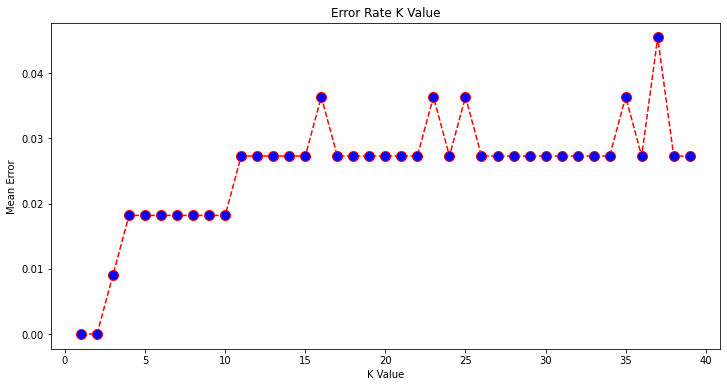

In [8]:

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



In [9]:
#predict for random values
x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7]]
y_random=(classifier.predict_proba(x_random))
y_res=(classifier.predict(x_random))
print(y_random)
print(y_res)
print(type(y_res))


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Artificial intelligence']
<class 'numpy.ndarray'>
